In [5]:
import numpy as np
from queue import PriorityQueue
import matplotlib.pyplot as plt
from astar_utils import get_neighbor_nodes, is_out_of_bounds, reconstruct_path
from astar_utils import load_board, plot_board, create_video_from_frames
# We use manhattan_distance as our heuristic function h(n). We do not need to define g(n) since it is just counting number of steps.
from astar_utils import manhattan_distance 
enable_animation = True

Here we define direction we can move, starting and goal coordinate, and load the board.

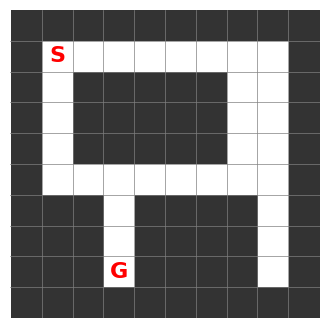

In [6]:
maze_path = 'maze/3.png'
maze_name = maze_path.split('.')[-2].split('/')[-1] # use for naming. don't worry

DIRECTION_MOVES = [(0,1), (0,-1), (-1,0), (1, 0)] # down, up, left, right
board = load_board(maze_path)
XY_WALLS = tuple(zip(*np.where(board==np.inf))) # walls
XY_STARTING = (1, 1)  # starting node
XY_GOAL = (8, 3)  # target node

plot_board(board, None, XY_STARTING, XY_GOAL)

greedy best-first search is here:

In [7]:
frames = []

H = board.copy() # table storing heurstics h(n)
H[XY_STARTING] = manhattan_distance(XY_STARTING, XY_GOAL)
bestPath = []

frontier = PriorityQueue()
frontier.put((H[XY_STARTING], XY_STARTING))
explored_set = set()
parent_map = {}
while not frontier.empty():
    cost, current_node = frontier.get() # get the node with lowest f(n) and remove it from the queue.
    explored_set.add(current_node)
    
    if enable_animation: # storing frame to create animation.
        frame = plot_board(H, current_node, XY_STARTING, XY_GOAL, frontier, parent_map, None, return_frame=True)
        frames.append(frame)
    
    if current_node == XY_GOAL: # found the goal node.
        bestPath = reconstruct_path(parent_map, XY_STARTING, XY_GOAL)
        frame = plot_board(H, current_node, XY_STARTING, XY_GOAL, frontier, parent_map, None, return_frame=True)
        frames.append(frame)
        break
    
    child_nodes = get_neighbor_nodes(current_node, DIRECTION_MOVES)
    for child in child_nodes:
        if is_out_of_bounds(child, board.shape) or (child in XY_WALLS) or (child in explored_set):
            # Do not explore if the move is invalide.
            continue
        
        h = manhattan_distance(child, XY_GOAL)
        if h < H[child]:
            H[child] = h
            frontier.put((h, child))
            parent_map[child] = current_node

exporting as video.. this may not work if you do not have the codec.

In [8]:
video = create_video_from_frames(frames, f'maze{maze_name}_greedy.mp4', fps=2)
video

Plot the figure frame-by-frame

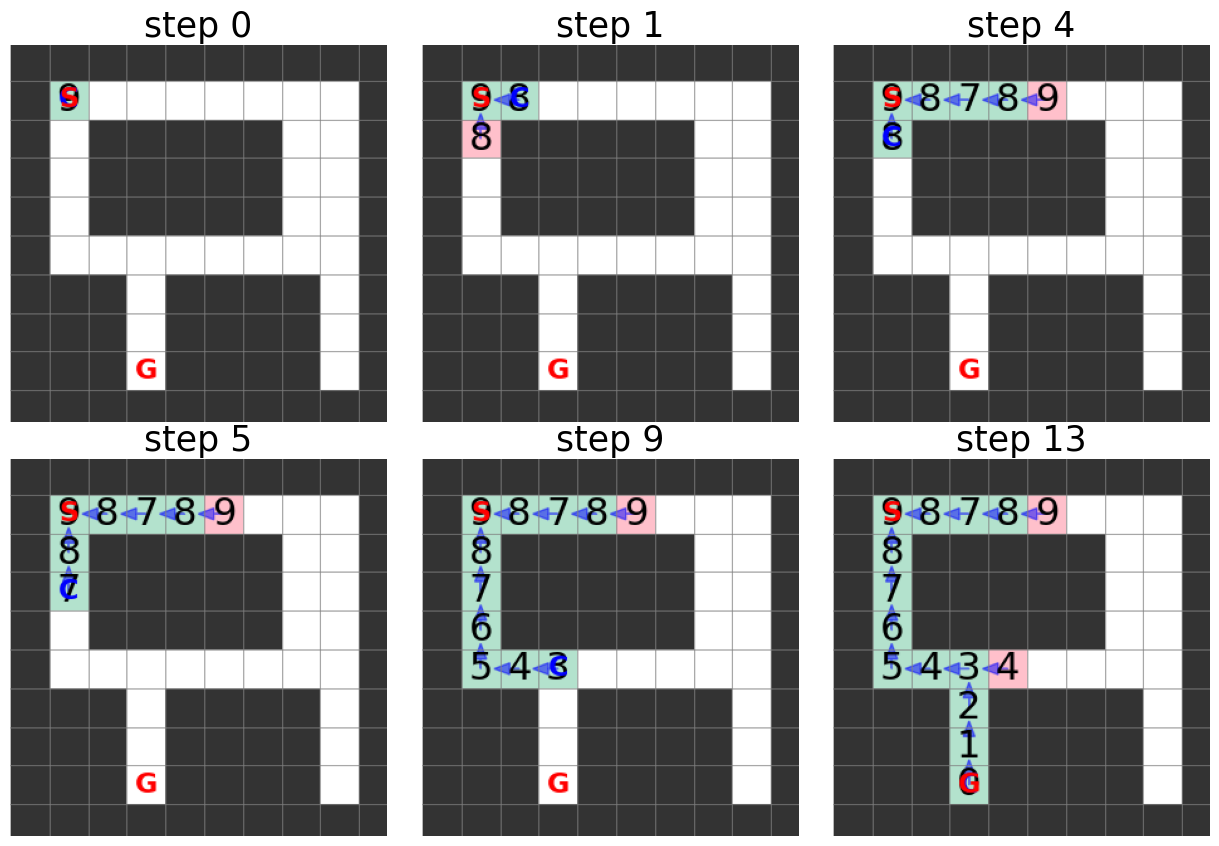

In [9]:
frame_indices = [0, 1, 4, 
                 5, 9, len(frames)-1]
fig, axes = plt.subplots(2, 3, figsize=(12.5, 8.5))
axes = axes.ravel()
for i, i_frame in enumerate(frame_indices):
    axes[i].imshow(frames[i_frame])
    axes[i].set_xlim(50, 350)
    axes[i].set_ylim(350, 50)
    axes[i].axis('off')
    axes[i].set_title(f'step {i_frame}', fontdict={"fontsize": 25})
plt.tight_layout()